In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/home/parikshit/Downloads/DA prelim task.xlsx')

In [3]:
df.head()

,S. No,Name,Age,Tenure,Job Role,Zone,Location,Contractual/Full time,I receive clear instructions and guidance from my supervisors.,I feel comfortable approaching my supervisors with questions or concerns.,...,I get on the job training by my supervisor,I try to acquire new knowledge and new skills through self learning and peer learning.,This is a physically safe place to work.,While on work utmost priority is given on the safety,\nI feel that there is no discrimination and harassment in the organization,\nI am satisfied with health insurance and medical insurance provided by the organization.,"\nI am satisfied with company’s leave policy (sick leave, paid leave etc)",\nI get my salary/wages on time,"\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.",Any comments
0,1.0,Samir Chattapadhyay,"59 Years, 7 Months",32.0,Sub-station Operator,DPS,Sen Raleigh,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Number of consumers are less that should be in...
1,2.0,Debashis Ball,"51 Years, 5 Months",32.0,Sub-station Operator,DPS,Santoria station,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Agree,Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Increase of number of consumers would be better
2,3.0,Sanjoy Chatterjee,"53 Years, 10 Months",32.0,Sub-station Operator,DPS,Parbelia,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Agree,Strongly Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,NaN
3,4.0,Shyamal Kumar Mondal,"57 Years, 1 Months",37.0,Sub-station Operator,DPS,OED Sub station,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Strongly agree,Strongly Agree,Strongly Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,NaN
4,5.0,Milan Banerjee,"49 Years, 6 Months",20.0,Sub-station Operator,DPS,Gopalpur Station,Full Time,Strongly agree,Strongly agree,...,Strongly agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly Agree,Promotion policy should be revised. Growth opp...


### Cleaning Data

In [4]:
df.drop(df.tail(4).index,inplace = True)

In [5]:
# drop last column extra - comments
df.drop(columns=df.columns[-1],  axis=1,  inplace=True)

In [6]:
df.isna().any()

S. No                                                                                                                      False
Name                                                                                                                       False
Age                                                                                                                        False
Tenure                                                                                                                     False
Job Role                                                                                                                   False
Zone                                                                                                                       False
Location                                                                                                                   False
Contractual/Full time                                                                            

In [7]:
# replacing reviews to 1-5 1 being lowest and 5 being highest
replacer = {'Strongly Disagree': 1,'Strongly disagree': 1, 'Disagree': 2,
            'Neutral': 3, 'nan':3,
            'Agree': 4, 'Strongly Agree': 5, 'Strongly agree':5}

# Select String Columns
# cols = df.columns[df.dtypes == 'object']
# Replace Values in those Columns
df.iloc[:, 8:] = df.iloc[:, 8:].replace(replacer)

In [8]:
df.isna().any()

S. No                                                                                                                      False
Name                                                                                                                       False
Age                                                                                                                        False
Tenure                                                                                                                     False
Job Role                                                                                                                   False
Zone                                                                                                                       False
Location                                                                                                                   False
Contractual/Full time                                                                            

In [9]:
columns_with_nan = ['\nI feel that there is no discrimination and harassment in the organization', 'I receive clear instructions and guidance from my supervisors.']

# Fill NaN values with the median of the corresponding column
for column in columns_with_nan:
    column_median = df[column].median()
    df[column].fillna(column_median, inplace=True)

In [10]:
# modifing the age from X years Y months to range A-B years
def age_to_months(age_str):
    age_list = age_str.split()
    years = int(age_list[0]) if len(age_list) >= 2 else 0
    months = int(age_list[2]) if len(age_list) == 5 else 0
    total_months = years * 12 + months
    return total_months

def map_to_intervals(age_in_months):
    interval = (age_in_months // 60) * 5
    return f"{interval}-{interval + 4}"

df['Age_months'] = df['Age'].apply(age_to_months)
# Apply the function to map ages to intervals
df['Age_interval years'] = df['Age_months'].apply(map_to_intervals)
df.drop(columns=['Age', 'Age_months'], inplace=True)

In [11]:
df

,S. No,Name,Tenure,Job Role,Zone,Location,Contractual/Full time,I receive clear instructions and guidance from my supervisors.,I feel comfortable approaching my supervisors with questions or concerns.,The organization values open and honest communication,...,I get on the job training by my supervisor,I try to acquire new knowledge and new skills through self learning and peer learning.,This is a physically safe place to work.,While on work utmost priority is given on the safety,\nI feel that there is no discrimination and harassment in the organization,\nI am satisfied with health insurance and medical insurance provided by the organization.,"\nI am satisfied with company’s leave policy (sick leave, paid leave etc)",\nI get my salary/wages on time,"\nThe compensation, benefits and facilities provided by the organization is better than among the top three in Asansol.",Age_interval years
0,1.0,Samir Chattapadhyay,32.0,Sub-station Operator,DPS,Sen Raleigh,Full Time,5.0,5,5,...,5,4,4,4,5.0,5,5,5,5,55-59
1,2.0,Debashis Ball,32.0,Sub-station Operator,DPS,Santoria station,Full Time,5.0,5,5,...,5,4,4,5,5.0,5,5,5,5,50-54
2,3.0,Sanjoy Chatterjee,32.0,Sub-station Operator,DPS,Parbelia,Full Time,5.0,5,5,...,5,4,5,5,5.0,5,5,5,5,50-54
3,4.0,Shyamal Kumar Mondal,37.0,Sub-station Operator,DPS,OED Sub station,Full Time,5.0,5,5,...,5,5,5,5,5.0,5,5,5,4,55-59
4,5.0,Milan Banerjee,20.0,Sub-station Operator,DPS,Gopalpur Station,Full Time,5.0,5,5,...,5,4,5,5,4.0,5,5,5,5,45-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71.0,Anand Kumar Singh,12.0,Sub-station Operator,DPS,Haripur,Full Time,5.0,5,5,...,5,5,5,5,5.0,5,5,5,5,40-44
71,72.0,Kajal Bouri,14.0,Sub-station Operator,DPS,Gopalpur,Full Time,5.0,5,5,...,5,5,5,5,5.0,5,5,5,5,40-44
72,73.0,Manas Banerjee,32.0,Sub-station Operator,LRS,Bankola,Full Time,5.0,5,5,...,5,5,5,5,5.0,5,5,5,5,55-59
73,74.0,Rantu Chatterjee,32.0,Sub-station Operator,DPS,Gopalpur,Full Time,5.0,5,5,...,5,5,5,5,5.0,5,5,5,5,55-59


In [12]:
df["Tenure"] = df["Tenure"].astype(int)


def map_to_intervals(tenure):
    interval = (tenure//5) *5
    return f"{interval}-{interval + 4}"

df['tenure_interval'] = df['Tenure'].apply(map_to_intervals)
df.drop(columns=['Tenure'], inplace=True)

In [32]:
df['tenure_interval'].unique()

array(['30-34', '35-39', '20-24', '15-19', '25-29', '10-14'], dtype=object)

In [14]:
df.isnull().sum()

S. No                                                                                                                      0
Name                                                                                                                       0
Job Role                                                                                                                   0
Zone                                                                                                                       0
Location                                                                                                                   0
Contractual/Full time                                                                                                      0
I receive clear instructions and guidance from my supervisors.                                                             0
I feel comfortable approaching my supervisors with questions or concerns.                                                  0


In [15]:
# for col in df:
#     print(df[col].name)
#     print(df[col].unique())

In [69]:
# column_list = ['col1', 'col2', 'col3']

# Calculate the average across columns and store it in a new "Average" column
# df['Average'] = df.iloc[:, 8:].mean(axis=1)

# Drop the original columns if needed
# df.drop(df.columns[8:-1], axis=1, inplace=True)


In [16]:
column_names_range = df.columns[6:-2].tolist()
df[column_names_range]= df[column_names_range].apply(pd.to_numeric)
# df.iloc[:, 6:-2] = df.iloc[:, 6:-2].astype(int)
# df.iloc[:, 7:-1] = df.iloc[:, 7:-1].astype(int)
df["While on work utmost priority is given on the safety"] = df["While on work utmost priority is given on the safety"].astype(int)

In [17]:
df.dtypes

S. No                                                                                                                      float64
Name                                                                                                                        object
Job Role                                                                                                                    object
Zone                                                                                                                        object
Location                                                                                                                    object
Contractual/Full time                                                                                                       object
I receive clear instructions and guidance from my supervisors.                                                             float64
I feel comfortable approaching my supervisors with questions or concerns.          

In [18]:
# sns.boxplot(x='Zone', y='Average', data=df)
# plt.title('Distribution of Response Variable Across Zones')
# plt.show()

## Zonal tests

In [19]:
zone1 = df[df['Zone'] == 'DPS']
zone1 = zone1.iloc[:,6:-2]

zone2 = df[df['Zone'] == 'LRS']
zone2 = zone2.iloc[:,6:-2]

zone3 = df[df['Zone'] == 'SPS']
zone3 = zone3.iloc[:,6:-2]

zone4 = df[df['Zone'] == 'Powerplant']
zone4 = zone4.iloc[:,6:-2]

anova_result = stats.f_oneway(
    zone1,zone2,zone3,zone4
)

/home/parikshit/Desktop/open_source/mdf_env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [20]:
anova_result

F_onewayResult(statistic=array([0.35161905, 0.39009733, 0.81679904, 0.14281227, 1.43425824,
       2.30949954, 1.34196292, 2.66864151, 2.44616592, 0.38980392,
       0.58387513, 0.72392157, 0.74358451,        nan,        nan,
       0.34726238]), pvalue=array([0.78808714, 0.7604805 , 0.48883542, 0.9339486 , 0.24000818,
       0.08367725, 0.26766563, 0.05410493, 0.07088483, 0.76069015,
       0.62753619, 0.54103558, 0.52963488,        nan,        nan,
       0.79122369]))

In [21]:
def t_testing(param1,param2):
    t_stat, p_value = stats.ttest_ind(
        param1,
        param2,
        equal_var=False
    )
    return t_stat, p_value

In [22]:
t_stat_12,p_value_12 = t_testing(zone1,zone2)
print("t_stats of zone 1 and 2",t_stat_12)
print("p_val of zone 1 and 2",p_value_12)

t_stats of zone 1 and 2 [-1.         -1.03684361 -2.02313587 -0.50927778 -0.41460316  1.98813889
  1.52737077  1.28497785  0.95697975  0.28810845  0.59787834 -1.43486011
 -0.22525703         nan         nan -1.60274993]
p_val of zone 1 and 2 [0.32417434 0.30502699 0.05074956 0.61547175 0.68134014 0.06525738
 0.14729315 0.22067755 0.3550679  0.77621274 0.55754046 0.16020306
 0.82374446        nan        nan 0.11797774]


/home/parikshit/Desktop/open_source/mdf_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [23]:
t_stat_34,p_value_34 = t_testing(zone3,zone4)
print("t_stats of zone 3 and 4",t_stat_34)
print("p_val of zone 3 and 4",p_value_34)

t_stats of zone 3 and 4 [        nan -1.         -1.          0.24740596         nan  0.07482716
 -0.23147156  1.04942293  1.51185789 -0.83565784 -0.74592978         nan
  1.03210642         nan         nan  0.11942054]
p_val of zone 3 and 4 [       nan 0.33317014 0.33317014 0.8082315         nan 0.94121987
 0.81935661 0.31764149 0.1690202  0.41231324 0.46395995        nan
 0.32689817        nan        nan 0.90623249]


## AGE

In [25]:
# ['55-59' '50-54' '45-49' '35-39' '40-44']
Age_group1 = df[df['Age_interval years'] == '35-39']
Age_group1 = Age_group1.iloc[:,6:-2]

Age_group2 = df[df['Age_interval years'] == '40-44']
Age_group2 = Age_group2.iloc[:,6:-2]

Age_group3 = df[df['Age_interval years'] == '45-49']
Age_group3 = Age_group3.iloc[:,6:-2]

Age_group4 = df[df['Age_interval years'] == '50-54']
Age_group4 = Age_group4.iloc[:,6:-2]

Age_group5 = df[df['Age_interval years'] == '55-59']
Age_group5 = Age_group5.iloc[:,6:-2]


In [26]:
anova_result = stats.f_oneway(
    Age_group1,Age_group2,Age_group3,Age_group4,Age_group5
)

In [27]:
anova_result

F_onewayResult(statistic=array([0.55151515, 0.68680068, 1.19124914, 1.08510012, 2.5266717 ,
       3.03913354, 4.18786552, 1.67221933, 0.33464036, 1.15616266,
       1.52561399, 1.15555556, 0.83520605,        nan,        nan,
       0.47863111]), pvalue=array([0.69852731, 0.60349336, 0.32231521, 0.37062286, 0.04827097,
       0.02274402, 0.00425124, 0.16616753, 0.85374673, 0.33765739,
       0.20417864, 0.33792822, 0.50740257,        nan,        nan,
       0.75128915]))

In [28]:
t_stat_12,p_value_12 = t_testing(Age_group1,Age_group2)
print("t_stats of age group 35-39 and 40-44",t_stat_12)
print("p_val of age group 35-39 and 40-44",p_value_12)

t_stat_34,p_value_34 = t_testing(Age_group3,Age_group4)
print("t_stats of age group 45-49 and 50-54",t_stat_34)
print("p_val of age group 45-49 and 50-54",p_value_34)

t_stat_45,p_value_45 = t_testing(Age_group4,Age_group5)
print("t_stats of age group 50-54 and 55-59",t_stat_45)
print("p_val of age group 50-54 and 55-59",p_value_45)

t_stats of age group 35-39 and 40-44 [        nan         nan         nan  1.09791658         nan -0.4472136
 -1.         -1.                 nan -0.4472136  -0.4472136          nan
 -1.                 nan         nan         nan]
p_val of age group 35-39 and 40-44 [       nan        nan        nan 0.30431463        nan 0.67533552
 0.39100222 0.39100222        nan 0.67533552 0.67533552        nan
 0.39100222        nan        nan        nan]
t_stats of age group 45-49 and 50-54 [-1.         -1.34044088 -1.81659021 -1.63192824 -0.65061529 -2.52555461
 -2.91981738 -1.32205125  0.17998875 -1.0132177  -1.50927449 -1.44749373
  1.40629142         nan         nan -0.98766715]
p_val of age group 45-49 and 50-54 [0.32818326 0.19271215 0.08293087 0.109646   0.51912591 0.01689582
 0.00779537 0.1941586  0.85796894 0.31748365 0.1416112  0.16185962
 0.16745926        nan        nan 0.33172833]
t_stats of age group 50-54 and 55-59 [        nan  1.04891452  1.3764944   0.76354833  2.05339603 -0.8692

## tenure

In [33]:
['30-34', '35-39', '20-24', '15-19', '25-29', '10-14']
tenure_group1 = df[df['tenure_interval'] == '10-14']
tenure_group1 = tenure_group1.iloc[:,6:-2]

tenure_group2 = df[df['tenure_interval'] == '15-19']
tenure_group2 = tenure_group2.iloc[:,6:-2]

tenure_group3 = df[df['tenure_interval'] == '20-24']
tenure_group3 = tenure_group3.iloc[:,6:-2]

tenure_group4 = df[df['tenure_interval'] == '25-29']
tenure_group4 = tenure_group4.iloc[:,6:-2]

tenure_group5 = df[df['tenure_interval'] == '30-34']
tenure_group5 = tenure_group5.iloc[:,6:-2]

tenure_group6 = df[df['tenure_interval'] == '35-39']
tenure_group6 = tenure_group6.iloc[:,6:-2]

anova_result = stats.f_oneway(
    tenure_group1,tenure_group2,tenure_group3,tenure_group4,tenure_group5,tenure_group6
)


In [34]:
anova_result

F_onewayResult(statistic=array([0.61694118, 1.06745175, 0.86405117, 0.62806826, 1.95781295,
       1.43571679, 0.47770323, 0.49923925, 2.10025225, 1.02003136,
       1.04908613, 0.76481928, 0.73627583,        nan,        nan,
       2.44754717]), pvalue=array([0.68725858, 0.38601752, 0.50980782, 0.67888366, 0.09591956,
       0.22249089, 0.79168497, 0.7757702 , 0.07571228, 0.4127257 ,
       0.39620283, 0.57829538, 0.59880251,        nan,        nan,
       0.04223055]))

In [36]:
t_stat_12,p_value_12 = t_testing(tenure_group1,tenure_group2)
print("t_stats of tenure group 10-14 and 15-19",t_stat_12)
print("p_val of age group 10-14 and 15-19",p_value_12)

t_stat_34,p_value_34 = t_testing(tenure_group3,tenure_group4)
print("t_stats of age group 20-24 and 25-29",t_stat_34)
print("p_val of age group 20-24 and 25-29",p_value_34)

t_stat_56,p_value_56 = t_testing(tenure_group5,tenure_group6)
print("t_stats of age group 30-34 and 35-40",t_stat_56)
print("p_val of age group 30-34 and 35-40",p_value_56)

t_stats of tenure group 10-14 and 15-19 [       nan 0.         1.         0.4143354  0.4472136  1.44115338
 0.27454851 0.87038828 1.         1.41610296 1.41610296        nan
 0.88852332        nan        nan        nan]
p_val of age group 10-14 and 15-19 [       nan 1.         0.33317014 0.68158398 0.65908126 0.16097029
 0.78556998 0.39219751 0.33317014 0.17089646 0.17089646        nan
 0.38195184        nan        nan        nan]
t_stats of age group 20-24 and 25-29 [        nan -1.         -1.         -1.453014           nan -1.5
 -1.         -0.5904344  -1.93649167 -0.69587405 -0.5904344  -1.
 -1.26451638         nan         nan -1.48122579]
p_val of age group 20-24 and 25-29 [       nan 0.3434364  0.3434364  0.16501577        nan 0.16785066
 0.3434364  0.56642285 0.08478521 0.50180097 0.56642285 0.3434364
 0.23535465        nan        nan 0.17268509]
t_stats of age group 30-34 and 35-40 [-1.          0.73789158  0.30313675 -0.49161719  1.38206815 -1.04726988
 -0.58901509 -1.2298193

In [39]:
for col in df:
    print(df[col].name)
    print(df[col].unique())

S. No
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75.]
Name
['Samir Chattapadhyay' 'Debashis Ball' 'Sanjoy Chatterjee'
 'Shyamal Kumar Mondal' 'Milan Banerjee' 'Mimbahadur Thapa'
 'Somenath Mishra' 'Tapas Maji' 'Sunil Bouri' 'Shiv P Chakraborty'
 'Tapan Kumar Mondal' 'Badal Dutta' 'Tapas Kumar Daripa'
 'Sabyasachi Patra' 'Sukumar Maji' 'Pradip Kumar Hazra' 'Soumen Deb'
 'Dhrubeswar Pattanayak' 'Bhim Mahato' 'Nirbhay Narayan Singh'
 'Rajat Kumar Saha' 'Sujit Ghiosh' 'Goutam Thakur' 'Swaraj Kumar Pandey'
 'Naresh Ball' 'Animesh Singha' 'Timir Sengupta' 'Anand Kumar Mishra'
 'Kingsuk Dhibar' 'Subrata Roy' 'Dipak Dutta' 'Shyam Bihari Gour'
 'Ramesh Mahato' 'Bhupendra Ravidas' 'Tamal Pal' 'Ranjeet' 'Samresh Singh'
 'Swapan Kumar Sen' 'Jit

# Visualization

In [37]:
# Calculate the average across columns and store it in a new "Average" column
df['Average'] = df.iloc[:, 6:-2].mean(axis=1)

In [63]:
def side_by_side_plots(df, x_col, y_col):
    # Set up the subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Bar plot on the first subplot (ax1)
    sns.barplot(x=x_col, y=y_col, data=df, ax=ax1)
    ax1.set_title('Bar Plot')
    ax1.set_xlabel(x_col)
    ax1.set_ylabel("Average Review Score")
    ax1.tick_params(axis='x', rotation=45)

    # Violin plot on the second subplot (ax2)
    sns.violinplot(x=x_col, y=y_col, data=df, ax=ax2)
    ax2.set_title('Violin Plot')
    ax2.set_xlabel(x_col)
    ax2.set_ylabel("Average Review Score")
    ax2.tick_params(axis='x', rotation=45)

    # Box plot on the third subplot (ax3)
    sns.boxplot(x=x_col, y=y_col, data=df, ax=ax3)
    ax3.set_title('Box Plot')
    ax3.set_xlabel(x_col)
    ax3.set_ylabel("Average Review Score")
    ax3.tick_params(axis='x', rotation=45)

    # Adjust the layout to prevent overlapping of subplots
    plt.tight_layout()

    # Save the plot as an image (e.g., PNG, JPEG, or PDF)
    plt.savefig(f'{x_col}_vs_{y_col}_plot.png')

    # Show the plot (if you want to display the plot in the notebook)
    plt.show()

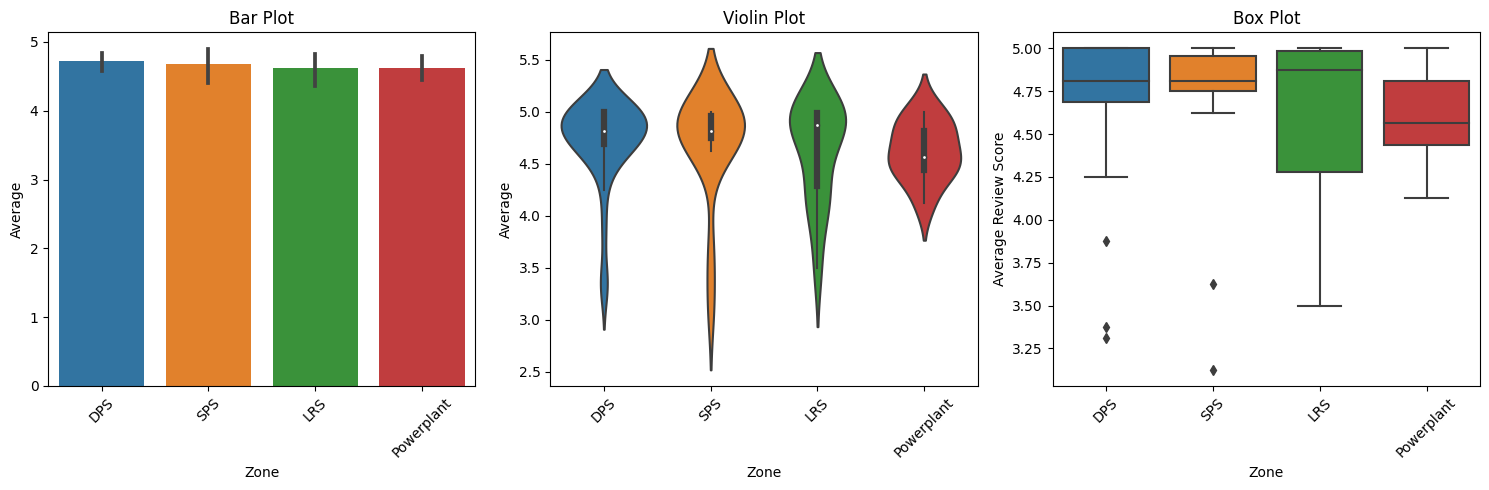

In [64]:
side_by_side_plots(df,"Zone","Average")

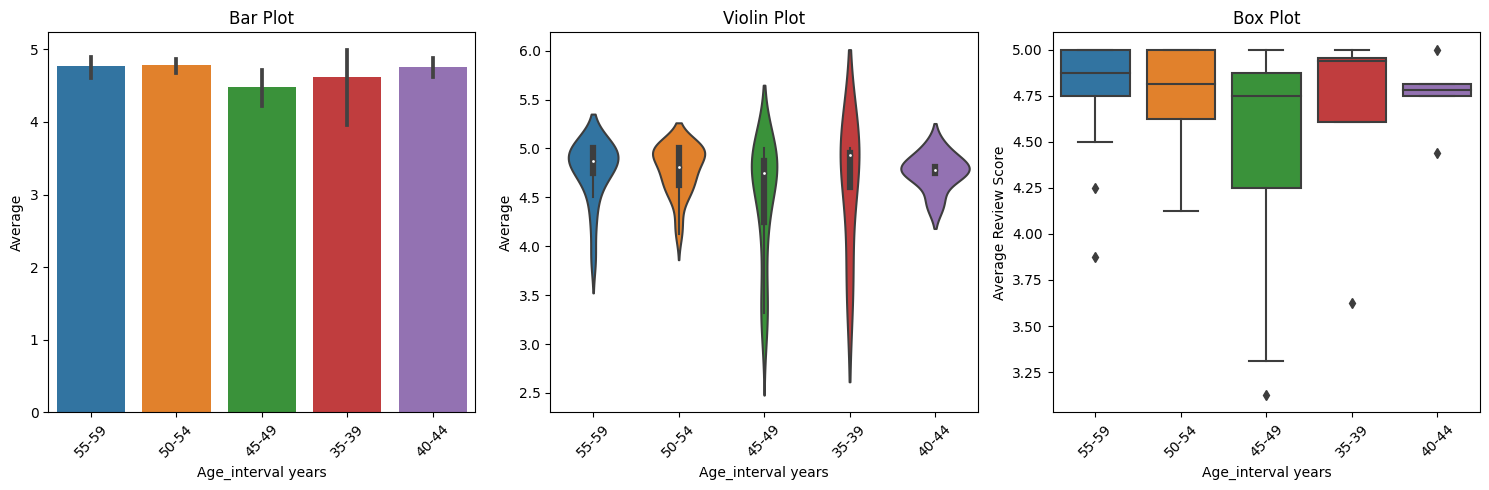

In [65]:
side_by_side_plots(df,"Age_interval years","Average")

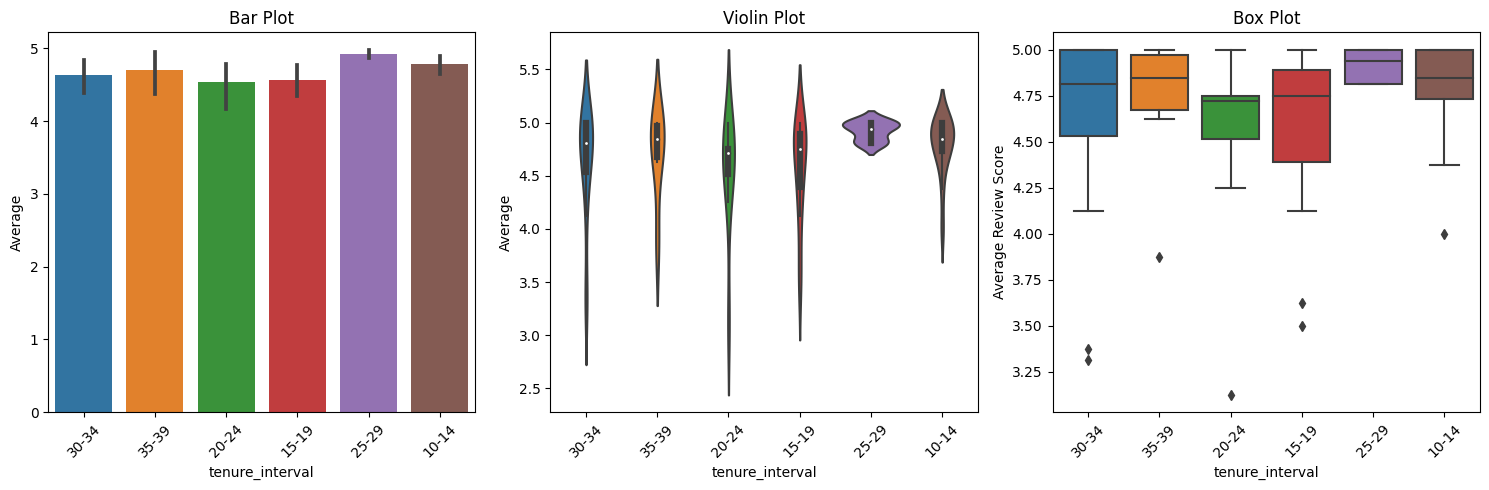

In [67]:
side_by_side_plots(df,"tenure_interval","Average")

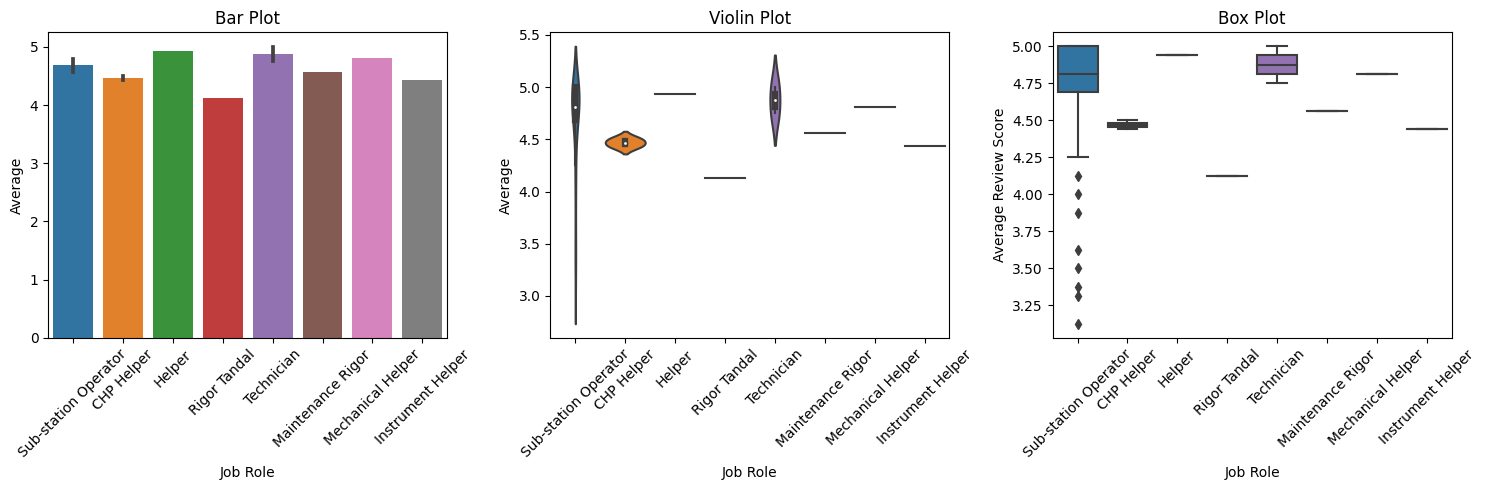

In [68]:
side_by_side_plots(df,"Job Role","Average")

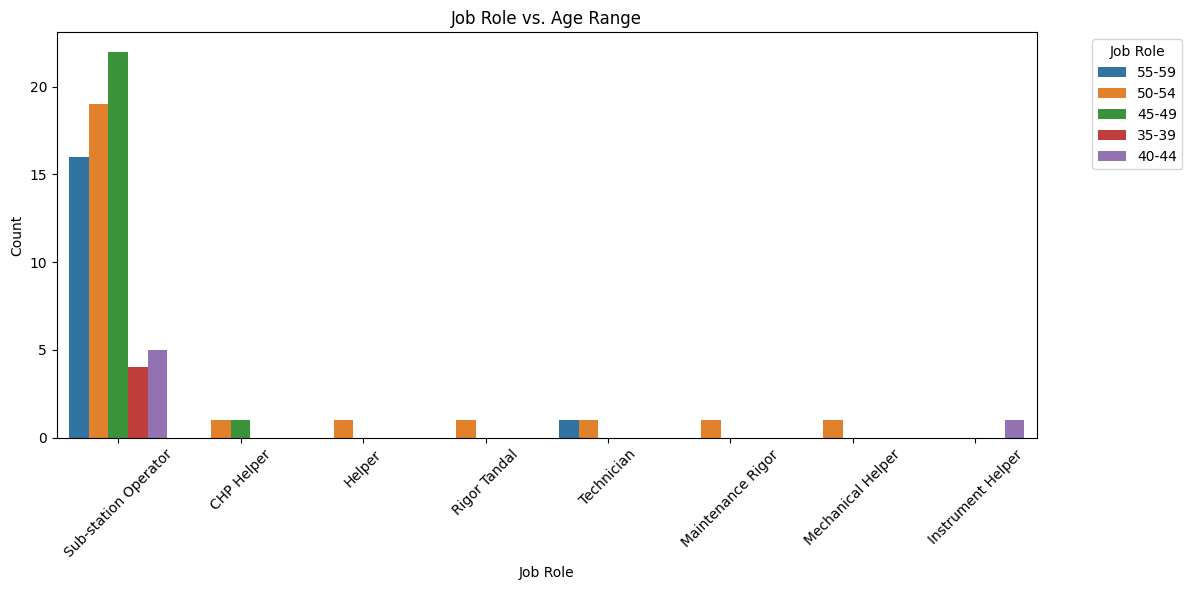

In [72]:
# Age vs Job Role

plt.figure(figsize=(12, 6))
sns.countplot(x='Job Role', hue='Age_interval years', data=df)
plt.title('Job Role vs. Age Range')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('age_vs_job_role.png')
plt.show()

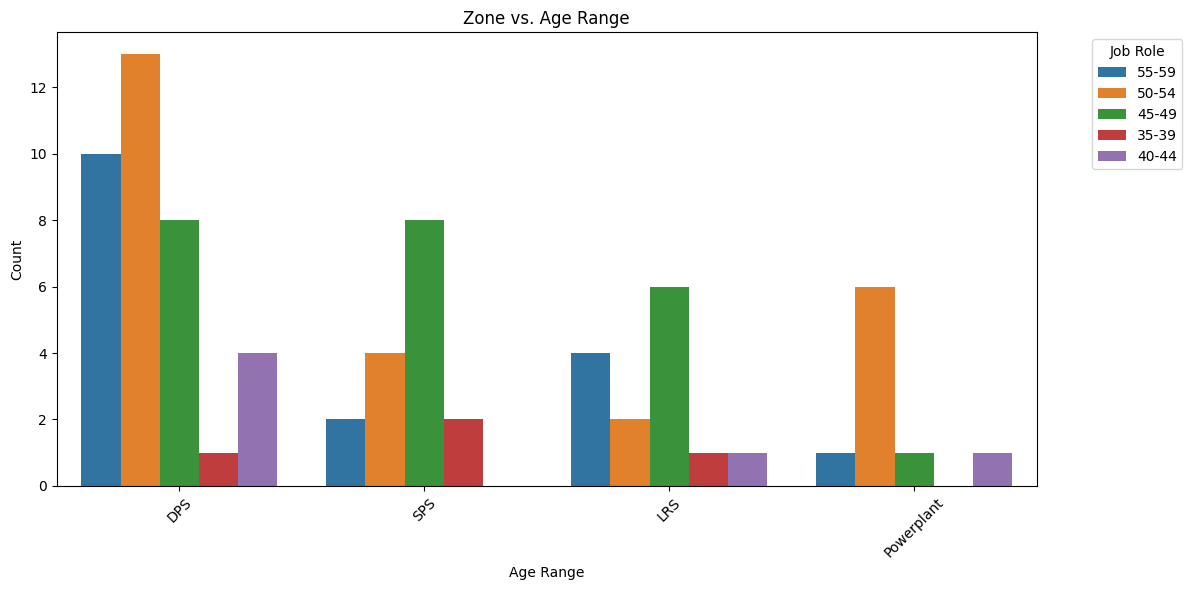

In [71]:
#Age vs Zone
plt.figure(figsize=(12, 6))
sns.countplot(x='Zone', hue='Age_interval years', data=df)
plt.title('Zone vs. Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('age_vs_zone.png')
plt.show()

In [50]:
# Most Satisfied employee
df.iloc[df['Average'].idxmax()]["Name"]

'Somenath Mishra'

In [51]:
# Least Satisfied employee
df.iloc[df['Average'].idxmin()]["Name"]

'Siddhartha Mukherjee'